# CS105 Final Project: Spam Email Classifier  
Made by: Francisco Bustamante, Daimon Spilker, Jaehyun Kim, Kevin Liang, Abhinav Ramachandran


# Introduction  
In this project we intend to use KNN classification to classify spam emails from non-spam emails. We are going to start with two very large folders full of spam and non-spam emails. From these folders we are going to tokenize all the words in every email to get a csv file that contains all the numerical values of each frequency of every word. From that data we are going to utilize exporatory data analysis to find the best features to use K-Nearest-Neighbor algorithm on. We are going to test our KNN algorithm using K-fold validation. By the end we want a model that is at least 80% accurate on detecting spam emails. 

# Data Collecting and Cleaning  
We started with two folders, all data we used can be found here https://spamassassin.apache.org/old/publiccorpus/ (this is a publically avalible database of spam and non-spam emails). The first folder contains 500 spam emails and the second folder contains 1000 non-spam emails. We are going to tokenize each email using the bag of words model. We cleaned up some data in this stage by having the tokenizing function only tokenize strings past the "Subject" line of the email. This is to eliminate all the unnecessary recipient/sender information included at the top of every email. We then end up with two CSV files, one for spam emails and one for non-spam emails. Every row of the CSV file corresponds to an email while every column correspsponds to a frequency of a word within that specific email.  
  
  
<b>CSV file of spam data:</b>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

spam = pd.read_csv("Spam_data.csv")
spam["Type"] = "spam"

spam.loc[:,'money':'No'] = spam.loc[:,'money':'No'].replace(np.nan, 0)

not_spam = pd.read_csv("Non_Spam_Data.csv")
not_spam["Type"] = "not_spam" 

not_spam.loc[:,'money':'No'] = spam.loc[:,'money':'No'].replace(np.nan, 0)

spam.head(3)

,and,you,=,a,<td,I,</tr>,that,is,or,...,due,<ul>,Six,recently,five,lot,strongly,Jody,possible,Type
0,3479,2503,2243,2161,1447,1120,1061,1030,1018,930,...,26,26,26,26,26,26,26,26,26,spam
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
2,3,5,3,1,0,0,0,0,3,1,...,0,0,0,0,0,0,0,0,0,spam


In [2]:
pip install -U scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis

We are going to use (insert_plot) and (insert_plot) to search for the best features to use for our KNN classifier. 

# KNN Classifier (Main Part)  
We want to create a KNN classifier that uses x, y, and z features to classify spam emails. Using KNN ...

<AxesSubplot:xlabel='money', ylabel='but'>

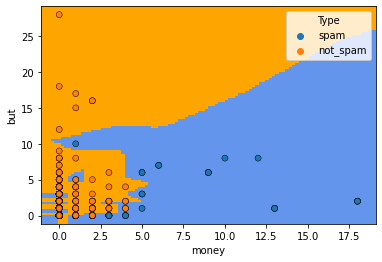

In [53]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 1

Spam_features = spam[['money' , 'but', 'Type']]
Not_spam_features = not_spam[['money', 'but', 'Type']]

features = pd.concat([Spam_features,Not_spam_features])
features = features.drop([0])

X = features[['money', 'but']]
y = features['Type']

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights= "uniform")
clf.fit(X, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

sns.scatterplot( data = features, x = "money", y = "but", hue = "Type", alpha=1.0, edgecolor="black")

# Conclusion (Report)  
We got a KNN classifier that has an accuracy of ...